# [Exercise 1](https://github.com/kokchun/Deep-learning-AI21/blob/main/Exercises/E1-MLP_image_classification.ipynb)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

from sklearn.model_selection import train_test_split

## 0

### a)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

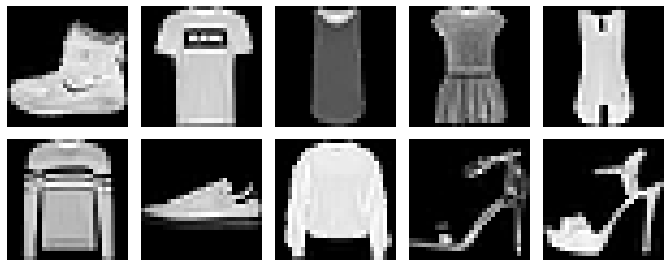

In [4]:
def display_images(data, rows=2, cols=5, figsize=(12,4)):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap='gray')
        ax.axis('off')
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

### b)

In [5]:
X_train.max(), X_train.min()

(255, 0)

In [6]:
scaled_X_train = X_train.astype('float32')/255
scaled_X_test = X_test.astype('float32')/255
scaled_X_test.min(), scaled_X_train.max()

(0.0, 1.0)

### c)

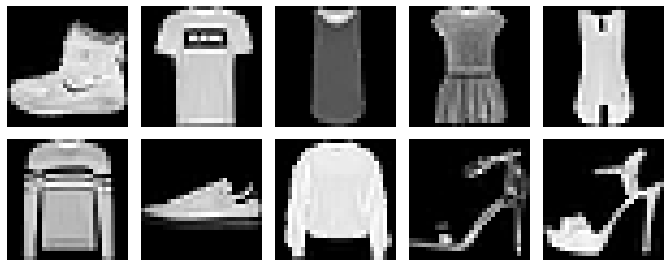

In [7]:
display_images(scaled_X_train)

### d)

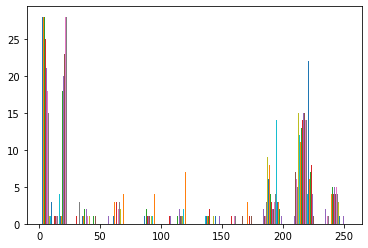

In [13]:

plt.hist(X_train[1]);

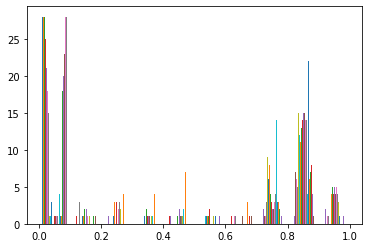

In [14]:
plt.hist(scaled_X_train[1]);

### e)

Yes it's balanced as there is the same amount of samples for each category

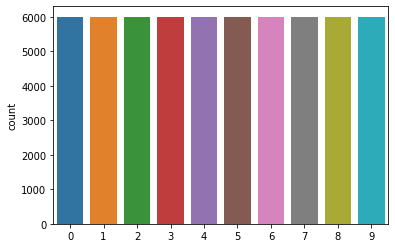

In [16]:
sns.countplot(x=y_train);

## 2

### a, b)

In [68]:
def model_image_28x28_10_classes(layers: list):
    model = Sequential(
        [Flatten(input_shape=(28, 28), name="input_layer")]
        + layers
        + [Dense(10, activation="softmax", name="output_layer")],
        name="mlp_model",
    )
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    model.summary()
    return model


def plot_metrics(model):
    metrics = pd.DataFrame(model.history.history)
    metrics.index = range(len(metrics))

    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]

    for ax, column in zip(axes, columns):
        metrics.plot(y=column, xlabel="Epochs", ylabel=column[0], ax=ax)


In [69]:
model_no_hidden_layers = model_image_28x28_10_classes([])

Model: "mlp_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_no_hidden_layers.fit(scaled_X_train, y_train, validation_split=1/6, epochs=50, verbose=0)

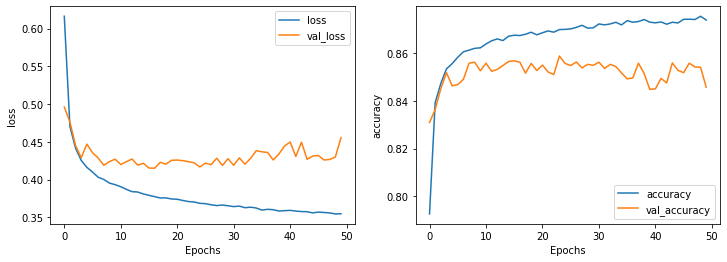

In [66]:
plot_metrics(model_no_hidden_layers)